In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/training_set_label.csv" )

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
len(df)

923

In [5]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
out = {'acquired' : 0, 'closed':1}
df.status = df.status.map(out)
df.status.value_counts()

0    597
1    326
Name: status, dtype: int64

In [7]:
df[['state_code','status']].groupby('state_code').mean()

,status
state_code,
AR,1.000000
AZ,0.500000
CA,0.319672
CO,0.263158
CT,1.000000
DC,0.500000
FL,0.666667
GA,0.454545
ID,1.000000


In [8]:
df.state_code.replace(['NM','WV','ID','AR','WI','MO','NV','ME','KY','IN','AZ','NH','TN','MI','UT','RI','DC','CT','MN','OH','FL','OR','NC','NJ','MD'],0, inplace = True)
df.state_code.replace(['TX','VA','GA'],1, inplace = True)
df.state_code.replace(['CO','NY'],2, inplace = True)

In [10]:
mapp = {0:0,1:1, 2:2, 'CA':3, 'IL':4,"MA":5, 'PA':6,'WA':7}
df.state_code = df.state_code.map(mapp)
df.state_code.value_counts().sum()

923

In [11]:
df.drop(columns = ['is_CA','is_NY', 'is_MA','is_TX','is_otherstate'], inplace = True)

In [12]:
df.category_code.describe()

count          923
unique          35
top       software
freq           153
Name: category_code, dtype: object

In [13]:
df.category_code.value_counts()

software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
biotech              34
network_hosting      34
hardware             27
public_relations     25
ecommerce            25
cleantech            23
analytics            19
security             19
social               14
search               12
messaging            11
other                11
news                  8
travel                8
fashion               8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
manufacturing         2
transportation        2
automotive            2
sports                1
hospitality           1
Name: category_code, dtype: int64

In [14]:
df.category_code.replace(['other','fashion','news','travel','photo_video','medical','music','finance','education','health','consulting','real_estate','manufacturing','transportation','automotive','hospitality','sports'],0,inplace = True)
df.category_code.replace(['software','web','mobile','biotech','messaging'],1,inplace = True)
df.category_code.replace(['search','social'],2,inplace = True)
df.category_code.replace(['ecommerce','cleantech'],3,inplace = True)
df.category_code.replace(['hardware','public_relations'],4,inplace = True)


In [15]:
df[['status', 'category_code']].groupby('category_code').mean()

,status
category_code,
0,0.341463
1,0.346793
2,0.423077
3,0.562500
4,0.596154
advertising,0.274194
analytics,0.157895
enterprise,0.232877
games_video,0.403846


In [16]:
mapcc = {0:0,1:0,'advertising':1,'analytics' :5,'enterprise':6,'games_video':7,'network_hosting':8,'security':9,'semiconductor':10}
df.category_code = df.category_code.map(mapcc)

In [17]:
df.drop(columns = ['is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],inplace = True)

In [18]:
df.object_id.value_counts()

c:28482    2
c:8676     1
c:36151    1
c:64694    1
c:22291    1
          ..
c:41957    1
c:15017    1
c:45428    1
c:5043     1
c:40762    1
Name: object_id, Length: 922, dtype: int64

In [19]:
df.drop(columns = ['object_id'], inplace = True)

In [20]:
print(df.funding_rounds.value_counts())
print(df.funding_rounds.value_counts().sum())

1     317
2     280
3     167
4      90
5      40
7      13
6      13
8       2
10      1
Name: funding_rounds, dtype: int64
923


In [21]:
df[['funding_rounds','status']].groupby('funding_rounds').mean()

,status
funding_rounds,
1,0.501577
2,0.360714
3,0.191617
4,0.188889
5,0.200000
6,0.153846
7,0.461538
8,0.500000
10,0.000000


In [22]:
df.funding_rounds.replace([4,5,6,7,8,9,10],3,inplace = True)

In [23]:
df[['status','has_VC']].groupby('has_VC').mean()

,status
has_VC,
0,0.334405
1,0.392027


In [24]:
df[['has_angel','status']].groupby('has_angel').mean()

,status
has_angel,
0,0.332849
1,0.412766


In [25]:
df[['has_roundA','status']].groupby('has_roundA').mean()

,status
has_roundA,
0,0.442731
1,0.266525


In [26]:
df[['has_roundB','status']].groupby('has_roundB').mean()

,status
has_roundB,
0,0.433155
1,0.229282


In [27]:
df[['has_roundC','status']].groupby('has_roundC').mean()

,status
has_roundC,
0,0.396893
1,0.209302


In [28]:
df[['has_roundD','status']].groupby('has_roundD').mean()

,status
has_roundD,
0,0.375451
1,0.152174


In [29]:
df[['is_top500','status']].groupby('is_top500').mean()

,status
is_top500,
0,0.659091
1,0.281124


In [30]:
df['state_code.1'].value_counts()

CA    487
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
MD      7
OR      7
NJ      7
FL      6
OH      6
MN      5
CT      4
DC      4
MI      3
RI      3
TN      3
UT      3
NV      2
NH      2
IN      2
KY      2
ME      2
MO      2
AZ      2
ID      1
WV      1
WI      1
AR      1
NM      1
Name: state_code.1, dtype: int64

In [31]:
df.drop(columns = ['state_code.1'],inplace = True)

In [32]:
df.milestones.value_counts()

1    250
2    246
3    182
0    152
4     62
5     24
6      6
8      1
Name: milestones, dtype: int64

In [33]:
df[['milestones','status']].groupby('milestones').mean()

,status
milestones,
0,0.690789
1,0.408000
2,0.280488
3,0.192308
4,0.193548
5,0.083333
6,0.166667
8,0.000000


In [34]:
df.milestones.replace(4,3,inplace = True)
df.milestones.replace([5,6,8,],3,inplace = True)

In [35]:
df.funding_total_usd.describe()

count    9.230000e+02
mean     2.541975e+07
std      1.896344e+08
min      1.100000e+04
25%      2.725000e+06
50%      1.000000e+07
75%      2.472500e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

In [36]:
df[['status','funding_total_usd']].corr()

,status,funding_total_usd
status,1.000000,-0.040176
funding_total_usd,-0.040176,1.000000


In [37]:
f0 = df.loc[df.status ==0,:]
v0 = f0.funding_total_usd
f1 = df.loc[df.status ==1,:]
v1 = f1.funding_total_usd

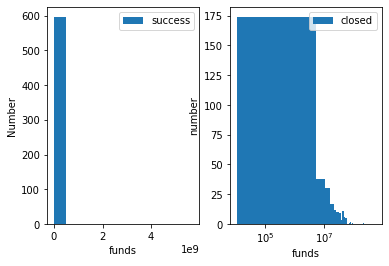

In [38]:
plt.subplot(121)
plt.hist(v0, label = 'success', bins = 12)
plt.legend()
plt.xlabel('funds')
plt.ylabel('Number')

plt.subplot(122)
plt.hist(v1, label = 'closed', bins = 100)
plt.legend()
plt.xlabel('funds')
plt.ylabel('number')
plt.xscale('log')

plt.show()

In [39]:
df.drop(columns = ['funding_total_usd'], inplace = True)

In [40]:
df.relationships.describe()

count    923.000000
mean       7.710726
std        7.265776
min        0.000000
25%        3.000000
50%        5.000000
75%       10.000000
max       63.000000
Name: relationships, dtype: float64

In [41]:
df.relationships.head()

0    3
1    9
2    5
3    5
4    2
Name: relationships, dtype: int64

In [42]:
df.relationships.value_counts()

3     100
5      98
4      90
2      79
6      71
1      63
7      45
9      43
8      41
10     41
0      37
12     27
13     26
11     22
15     19
16     18
14     15
21     10
18     10
17      9
19      8
27      5
25      5
23      5
22      5
24      4
30      4
28      3
35      3
26      3
37      3
29      2
63      1
57      1
31      1
32      1
33      1
38      1
42      1
45      1
20      1
Name: relationships, dtype: int64

In [43]:
df.relationships.replace(2,1,inplace = True)
df.relationships.replace(3,2,inplace = True)
df.relationships.replace([4,5,6,7,8],3,inplace = True)
df.relationships.replace(np.arange(9,17,1),4,inplace = True)
df.relationships.replace(np.arange(17,64,1),5,inplace = True)

In [44]:
df[['relationships','status']].groupby('relationships').mean()

,status
relationships,
0,0.918919
1,0.732394
2,0.490000
3,0.301449
4,0.146919
5,0.045455


In [45]:
df[['status','relationships']].corr()

,status,relationships
status,1.000000,-0.492803
relationships,-0.492803,1.000000


In [46]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [47]:
df[['avg_participants','status']].corr()

,avg_participants,status
avg_participants,1.000000,-0.185992
status,-0.185992,1.000000


In [48]:
df.avg_participants.describe()

count    923.000000
mean       2.838586
std        1.874601
min        1.000000
25%        1.500000
50%        2.500000
75%        3.800000
max       16.000000
Name: avg_participants, dtype: float64

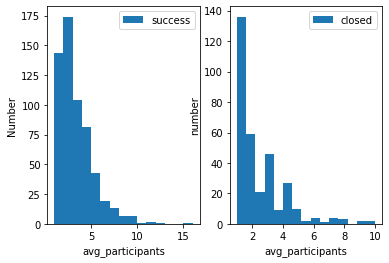

In [49]:
f0 = df.loc[df.status ==0,:]
v0 = f0.avg_participants
f1 = df.loc[df.status ==1,:]
v1 = f1.avg_participants

plt.subplot(121)
plt.hist(v0, label = 'success', bins = 15)
plt.legend()
plt.xlabel('avg_participants')
plt.ylabel('Number')

plt.subplot(122)
plt.hist(v1, label = 'closed', bins = 15)
plt.legend()
plt.xlabel('avg_participants')
plt.ylabel('number')

plt.show()

In [50]:
df.avg_participants = df.avg_participants.astype('int')
df.avg_participants.value_counts()

1     282
2     252
3     159
4     108
5      55
6      24
7      17
9      10
8      10
11      2
10      2
16      1
12      1
Name: avg_participants, dtype: int64

In [51]:
df[['avg_participants','status']].groupby('avg_participants').mean()

,status
avg_participants,
1,0.489362
2,0.309524
3,0.345912
4,0.250000
5,0.218182
6,0.208333
7,0.235294
8,0.300000
9,0.300000


In [52]:
df[['status','avg_participants']].corr()

,status,avg_participants
status,1.000000,-0.155476
avg_participants,-0.155476,1.000000


In [54]:
df.drop(columns = ['Unnamed: 0', 'latitude','longitude','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','category_code'], inplace = True)

In [60]:
df.drop(columns = ['age_last_milestone_year','age_first_milestone_year'], inplace = True)

In [55]:
Y = df.status
df.drop(columns = ['status'], inplace = True)

In [61]:
train_x, test_x,train_y,test_y = train_test_split(df,Y)

In [62]:
gbr = RandomForestClassifier(criterion = 'gini', max_depth = 6, max_features = 'auto', min_samples_split = 5,warm_start = True)
gbr.fit(train_x,train_y)
yp = gbr.predict(test_x)
xyz = confusion_matrix(test_y, yp)
print((xyz[0][0]+xyz[1][1])/231)

0.8181818181818182


In [63]:
df2 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/testing_set_label.csv')

In [320]:
res = pd.DataFrame(yp) 
res.index = test_data.index 
res.columns = ["prediction"]
mapres = {0 : 'acquired', 1: 'closed'}
res.prediction = res.prediction.map(mapres)
res.to_csv(r'C:\Users\Pranav\Desktop\Projects\datathon5\out5.csv', index = False)  